In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd


In [2]:
df = pd.read_csv('../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"
px.set_mapbox_access_token(mapbox_token)
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday
df["GRAVE_MORT"] = df["NB_BLESSES_GRAVES"] + df["NB_MORTS"]
df["NB_BLESSE_VEHICULE"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_VICTIMES_PIETON'] \
                    - df['NB_VICTIMES_VELO']
df["NB_BLESSE_VELO_PIETON"] = df['NB_VICTIMES_TOTAL'] \
                    -  df['NB_BLESSE_VEHICULE'] \

df["TYPE"] = df["nb_camionLourd_tractRoutier"].apply(lambda x : "Autre" if x == 0 else "CAMION")

# Moment + Type

## À quel moment de la journée est-ce que les camions ont des accidents par rapport aux autres véhicules?

In [3]:
df.columns

Index(['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP',
       'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN',
       'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS',
       'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR',
       'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN',
       'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'NB_DECES_PIETO

In [4]:


dfLourd = df[df['nb_camionLourd_tractRoutier'] > 0]
dfOther = df[df['nb_camionLourd_tractRoutier'] == 0]


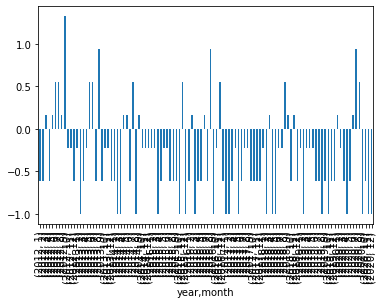

In [47]:
df_l = dfLourd.groupby(['year', 'month']).sum()['GRAVE_MORT']
meanL = dfLourd.groupby(['year', 'month']).sum()['GRAVE_MORT'].loc[2012].mean()
f2 = (df_l/meanL -1 ).plot(kind='bar')


In [37]:
dfOther.groupby(['year', 'month']).sum()['NB_VICTIMES_TOTAL'].loc[2016].mean()

507.1666666666667

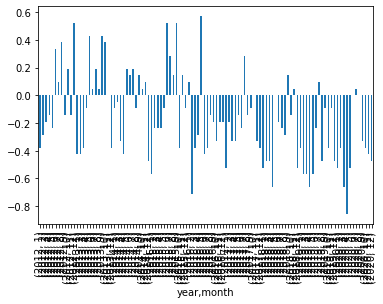

In [48]:
df_o = dfOther.groupby(['year', 'month']).sum()['GRAVE_MORT']
meanO = dfOther.groupby(['year', 'month']).sum()['GRAVE_MORT'].loc[2012].mean()
f2 = (df_o/meanO -1 ).plot(kind='bar')


In [13]:
df.groupby(['year', 'month']).count().reset_index()

,year,month,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,...,LOC_DETACHEE,LOC_IMPRECISION,LOC_LONG,LOC_LAT,day,weekday,GRAVE_MORT,NB_BLESSE_VEHICULE,NB_BLESSE_VELO_PIETON,TYPE
0,2012,1,3090,3090,3090,3090,1461,15,0,2828,...,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
1,2012,2,2529,2529,2529,2529,1200,3,1,2311,...,2529,2529,2528,2528,2529,2529,2529,2529,2529,2529
2,2012,3,2608,2608,2608,2608,1276,6,0,2402,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608
3,2012,4,2246,2246,2246,2246,1042,6,1,2079,...,2246,2246,2246,2246,2246,2246,2246,2246,2246,2246
4,2012,5,2502,2502,2502,2502,1107,8,0,2303,...,2502,2502,2502,2502,2502,2502,2502,2502,2502,2502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2020,8,1277,1277,1277,1277,505,2,4,1235,...,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277
104,2020,9,1357,1357,1357,1355,551,1,1,1305,...,1356,1357,1357,1357,1357,1357,1357,1357,1357,1357
105,2020,10,1169,1169,1169,1166,455,2,1,1126,...,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
106,2020,11,1123,1123,1123,1120,456,2,4,1088,...,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
